## Tarea opti

## Instacia 1

Problema con 50 ubicaciones potenciales y 100 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [11, 14, 15, 33, 44]
  Costo total: 23468
  Número de iteraciones: 200
  Tiempo de ejecución: 0.52 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 23468
    Peor: 23468
    Promedio: 23468.00
    Desviación porcentual: 0.00%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [11, 14, 15, 33, 44]
  Costo total: 23468
  Número de iteraciones: 200
  Tiempo de ejecución: 0.60 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 23468
    Peor: 34448
    Promedio: 27568.72
    Desviación porcentual: 0.00%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [11, 14, 26, 32, 36, 44, 49]
  Costo tot

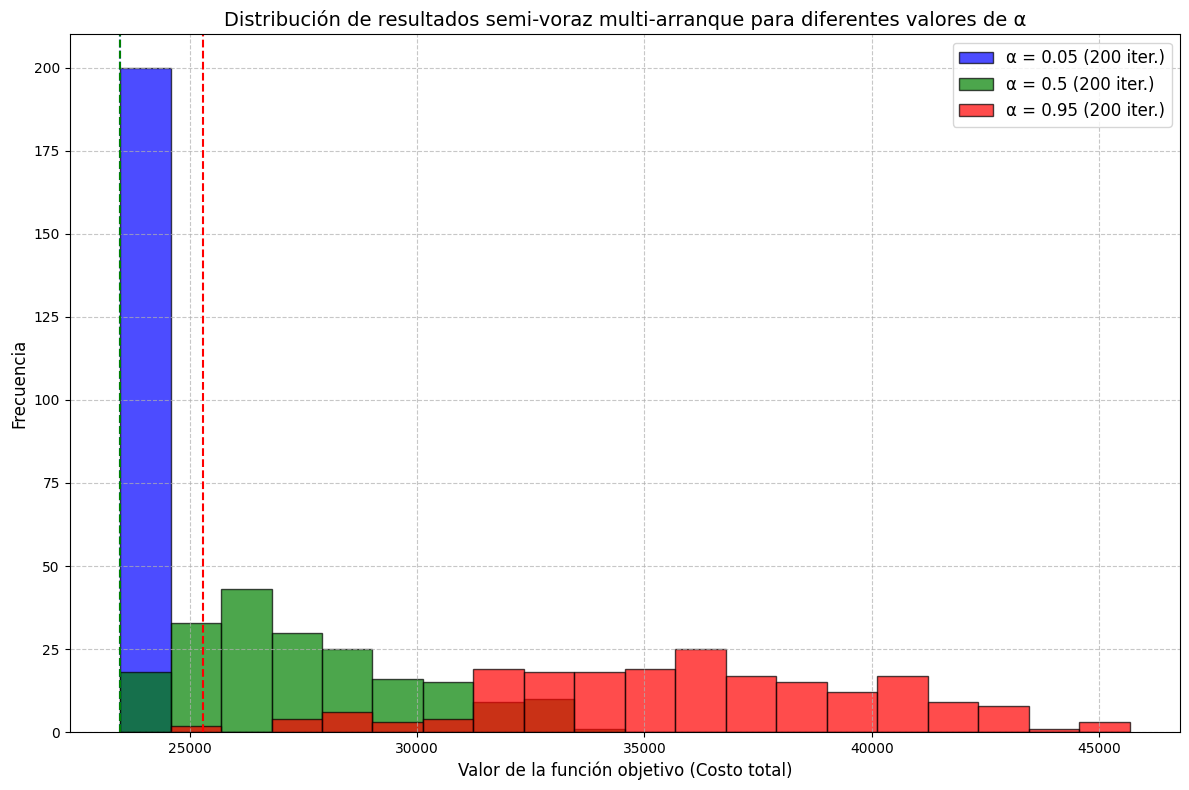


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [11, 14, 15, 33, 44]
  Costo total: 23468
  Total de iteraciones: 51
  Tiempo de ejecución: 0.20 segundos
  Estadísticas de las 51 iteraciones:
    Mejor: 23468
    Peor: 23468
    Promedio: 23468.00
    Desviación porcentual: 0.00%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [11, 14, 15, 33, 44]
  Costo total: 23468
  Total de iteraciones: 60
  Tiempo de ejecución: 0.35 segundos
  Estadísticas de las 60 iteraciones:
    Mejor: 23468
    Peor: 27447
    Promedio: 24725.03
    Desviación porcentual: 0.00%

Ejecutando algoritmo GRASP con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [11, 14, 15, 26, 33, 44]
  Costo total: 23897
  Total de iteraciones: 89
  Tiempo de ejecución: 0.65 segundos
  Estadísticas de las 89 iteraciones:
    Mejor: 23897
    Peor: 37949
    Promed

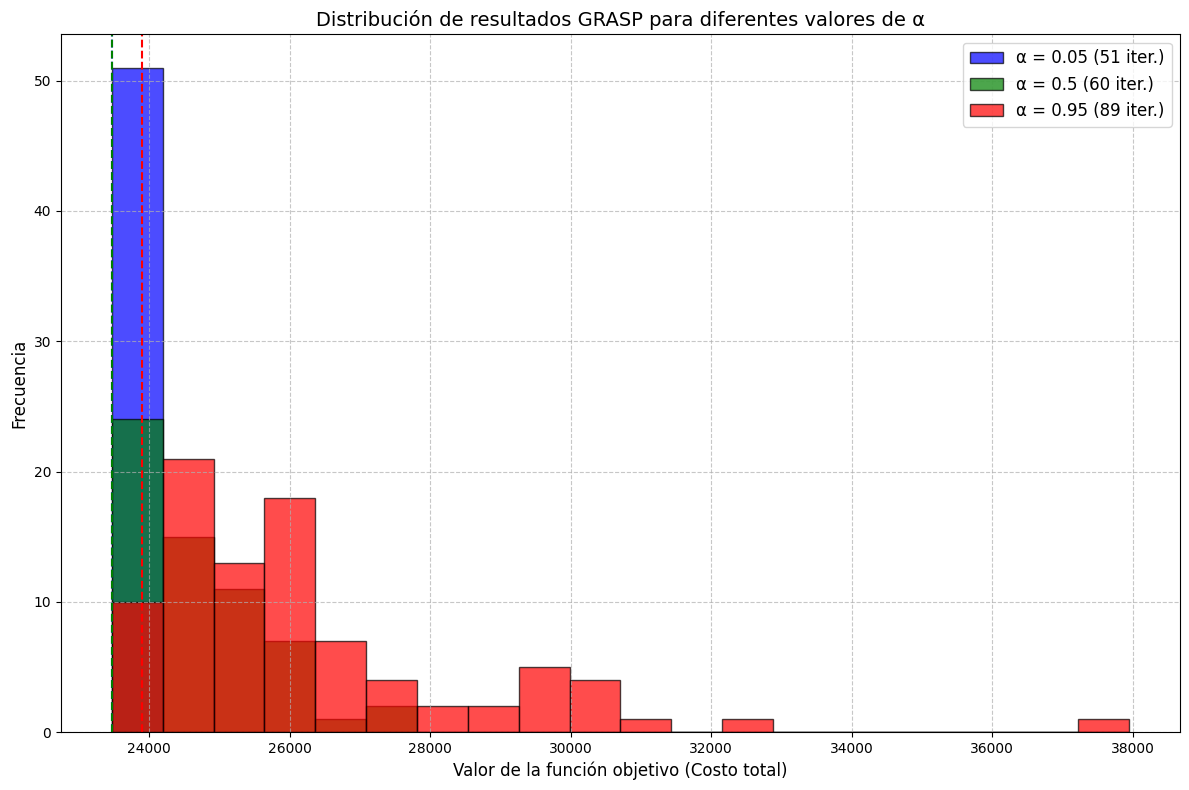


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo GRASP con alpha = 0.05:
  Instalaciones seleccionadas: [11, 14, 15, 33, 44]
  Costo total: 23468


In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-1.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-23468)/23468)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-23468)/23468)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 2

Problema con 50 ubicaciones potenciales y 100 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [5, 17, 24, 28, 31]
  Costo total: 22119
  Número de iteraciones: 200
  Tiempo de ejecución: 0.52 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 22119
    Peor: 22364
    Promedio: 22232.92
    Desviación porcentual: 0.00%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [5, 17, 24, 28, 31]
  Costo total: 22119
  Número de iteraciones: 200
  Tiempo de ejecución: 0.63 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 22119
    Peor: 32884
    Promedio: 26958.70
    Desviación porcentual: 0.00%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [5, 6, 13, 17, 28, 30, 31]
  Costo total: 

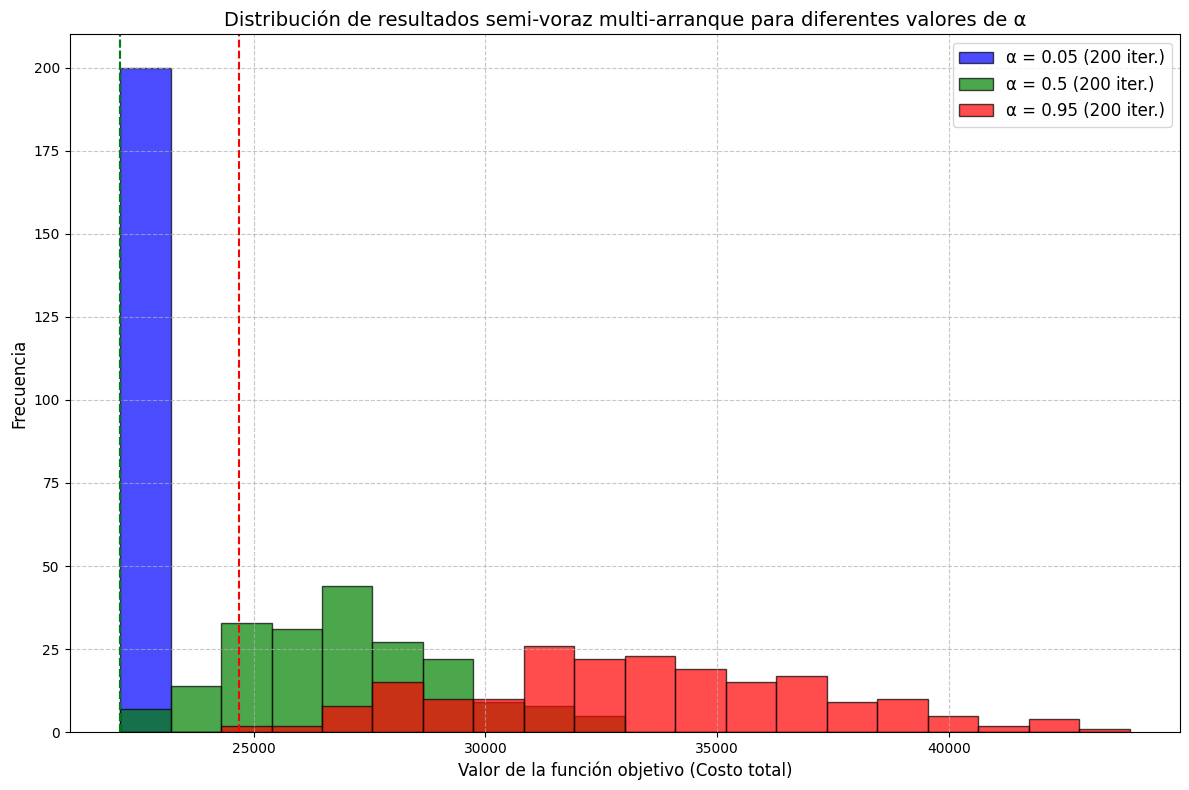


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [5, 17, 24, 28, 31]
  Costo total: 22119
  Total de iteraciones: 52
  Tiempo de ejecución: 0.20 segundos
  Estadísticas de las 52 iteraciones:
    Mejor: 22119
    Peor: 22364
    Promedio: 22222.65
    Desviación porcentual: 0.00%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [5, 17, 24, 25, 28, 31]
  Costo total: 22440
  Total de iteraciones: 52
  Tiempo de ejecución: 0.33 segundos
  Estadísticas de las 52 iteraciones:
    Mejor: 22440
    Peor: 27762
    Promedio: 24196.98
    Desviación porcentual: 1.45%

Ejecutando algoritmo GRASP con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [5, 17, 24, 25, 28, 31]
  Costo total: 22440
  Total de iteraciones: 73
  Tiempo de ejecución: 0.54 segundos
  Estadísticas de las 73 iteraciones:
    Mejor: 22440
    Peor: 31735
    Prome

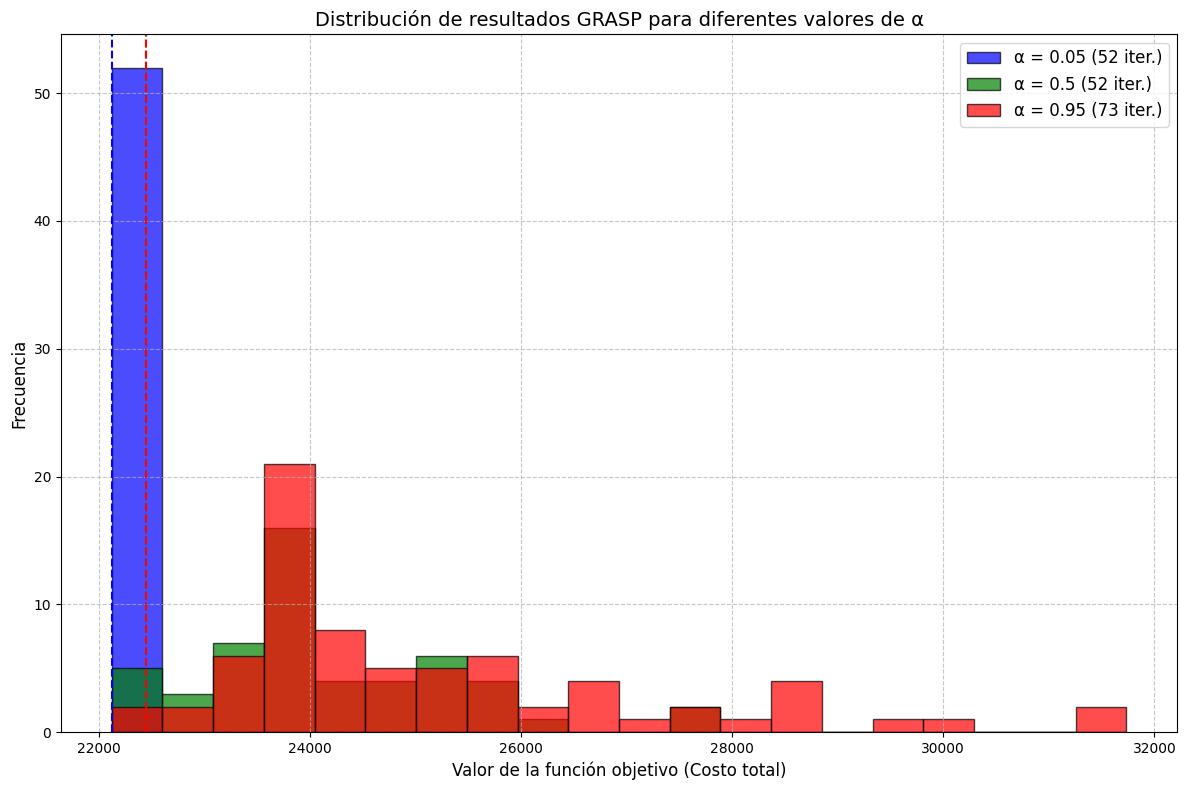


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo GRASP con alpha = 0.05:
  Instalaciones seleccionadas: [5, 17, 24, 28, 31]
  Costo total: 22119


In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-2.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-22119)/22119)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-22119)/22119)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 3

Problema con 50 ubicaciones potenciales y 100 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [18, 33, 42, 47]
  Costo total: 25132
  Número de iteraciones: 200
  Tiempo de ejecución: 0.43 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 25132
    Peor: 25132
    Promedio: 25132.00
    Desviación porcentual: 0.38%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [10, 33, 42, 48]
  Costo total: 25038
  Número de iteraciones: 200
  Tiempo de ejecución: 0.56 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 25038
    Peor: 35106
    Promedio: 28301.83
    Desviación porcentual: 0.00%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [18, 33, 38, 42, 47, 48]
  Costo total: 26339
  

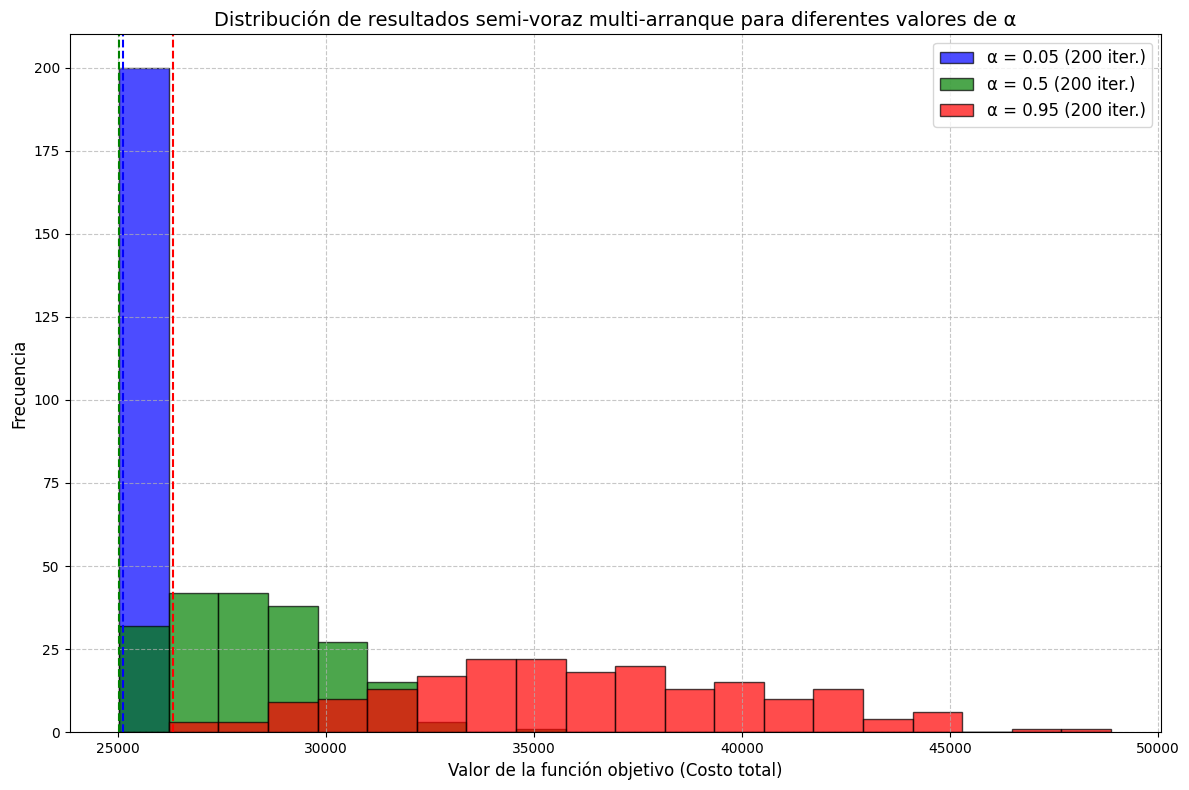


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [18, 33, 42, 47]
  Costo total: 25132
  Total de iteraciones: 51
  Tiempo de ejecución: 0.17 segundos
  Estadísticas de las 51 iteraciones:
    Mejor: 25132
    Peor: 25132
    Promedio: 25132.00
    Desviación porcentual: 0.38%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [18, 33, 42, 47, 48]
  Costo total: 25154
  Total de iteraciones: 54
  Tiempo de ejecución: 0.31 segundos
  Estadísticas de las 54 iteraciones:
    Mejor: 25154
    Peor: 28065
    Promedio: 25856.98
    Desviación porcentual: 0.46%

Ejecutando algoritmo GRASP con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [18, 33, 42, 46, 47]
  Costo total: 25225
  Total de iteraciones: 66
  Tiempo de ejecución: 0.50 segundos
  Estadísticas de las 66 iteraciones:
    Mejor: 25225
    Peor: 35792
    Promedio: 2740

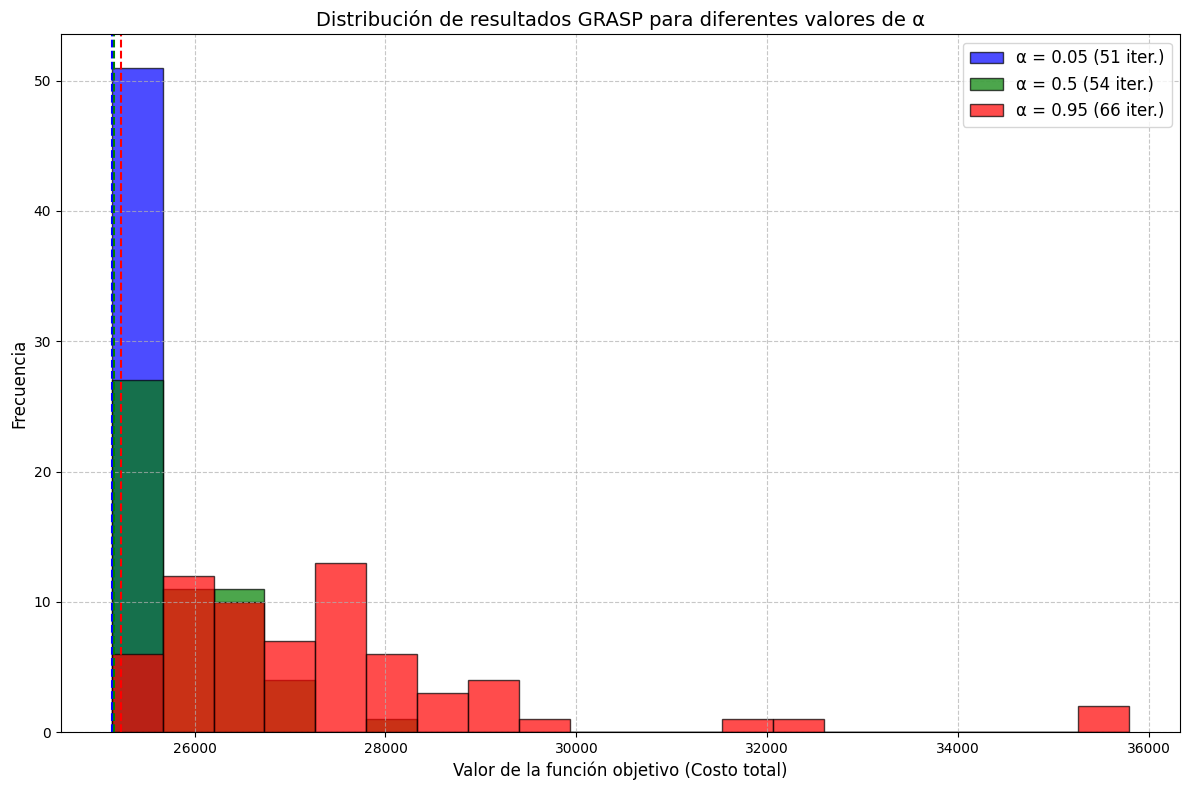


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo Semi-voraz multi-arranque con alpha = 0.5:
  Instalaciones seleccionadas: [10, 33, 42, 48]
  Costo total: 25038


In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-3.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-25038)/25038)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-25038)/25038)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 4

Problema con 50 ubicaciones potenciales y 100 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 2, 4, 10, 45, 47]
  Costo total: 22515
  Número de iteraciones: 200
  Tiempo de ejecución: 0.59 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 22515
    Peor: 24145
    Promedio: 22819.75
    Desviación porcentual: 2.98%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 2, 4, 10, 22, 45, 47]
  Costo total: 22517
  Número de iteraciones: 200
  Tiempo de ejecución: 0.66 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 22517
    Peor: 33740
    Promedio: 26964.33
    Desviación porcentual: 2.99%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [4, 10, 15, 27, 33, 47]
  Costo to

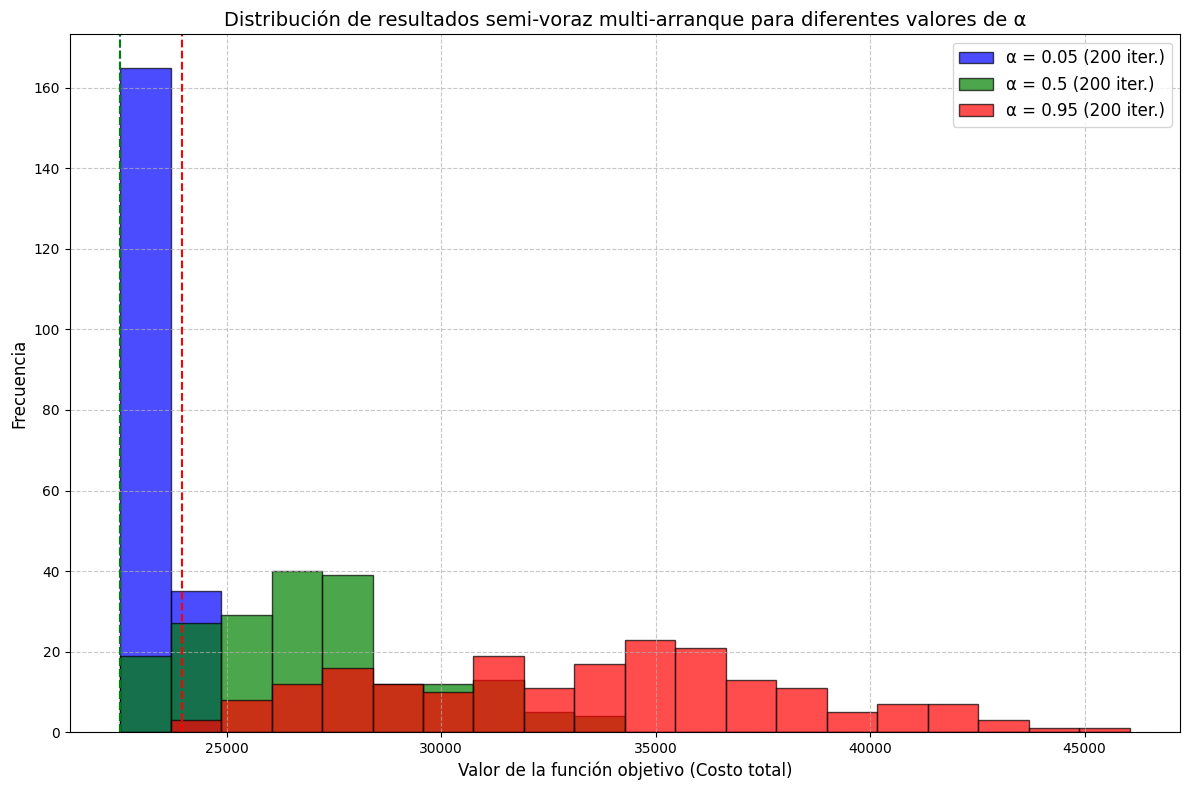


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 2, 4, 10, 22, 47]
  Costo total: 21952
  Total de iteraciones: 55
  Tiempo de ejecución: 0.25 segundos
  Estadísticas de las 55 iteraciones:
    Mejor: 21952
    Peor: 24145
    Promedio: 22478.02
    Desviación porcentual: 0.40%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 4, 10, 22, 47, 49]
  Costo total: 21864
  Total de iteraciones: 73
  Tiempo de ejecución: 0.48 segundos
  Estadísticas de las 73 iteraciones:
    Mejor: 21864
    Peor: 28387
    Promedio: 23016.75
    Desviación porcentual: 0.00%

Ejecutando algoritmo GRASP con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 4, 22, 40, 47, 49]
  Costo total: 22044
  Total de iteraciones: 57
  Tiempo de ejecución: 0.46 segundos
  Estadísticas de las 57 iteraciones:
    Mejor: 22044
    Peor: 31434
    Prome

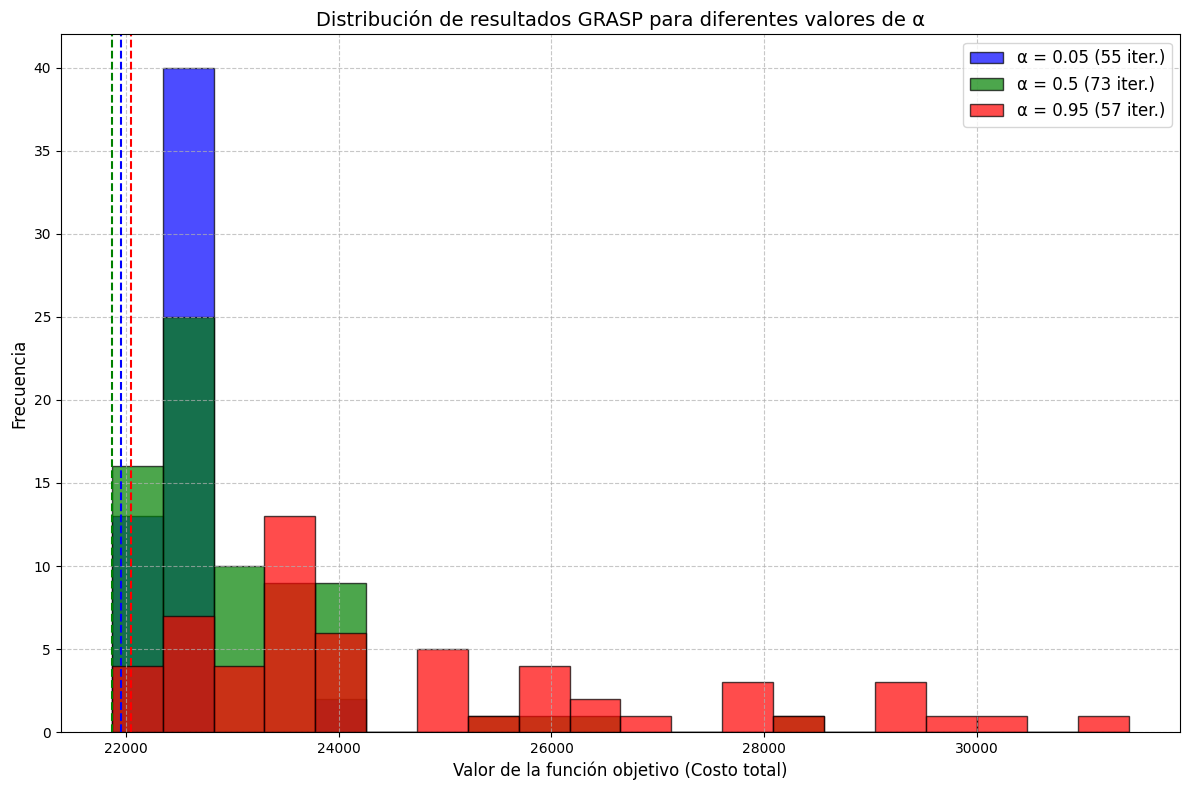


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo GRASP con alpha = 0.5:
  Instalaciones seleccionadas: [1, 4, 10, 22, 47, 49]
  Costo total: 21864


In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-4.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-21864)/21864)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-21864)/21864)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 5

Problema con 50 ubicaciones potenciales y 100 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 20, 32, 40, 47]
  Costo total: 24198
  Número de iteraciones: 200
  Tiempo de ejecución: 0.51 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 24198
    Peor: 24198
    Promedio: 24198.00
    Desviación porcentual: 0.93%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 20, 26, 32, 47]
  Costo total: 23976
  Número de iteraciones: 200
  Tiempo de ejecución: 0.57 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 23976
    Peor: 34488
    Promedio: 28835.92
    Desviación porcentual: 0.00%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 15, 20, 26, 32, 46]
  Costo total: 250

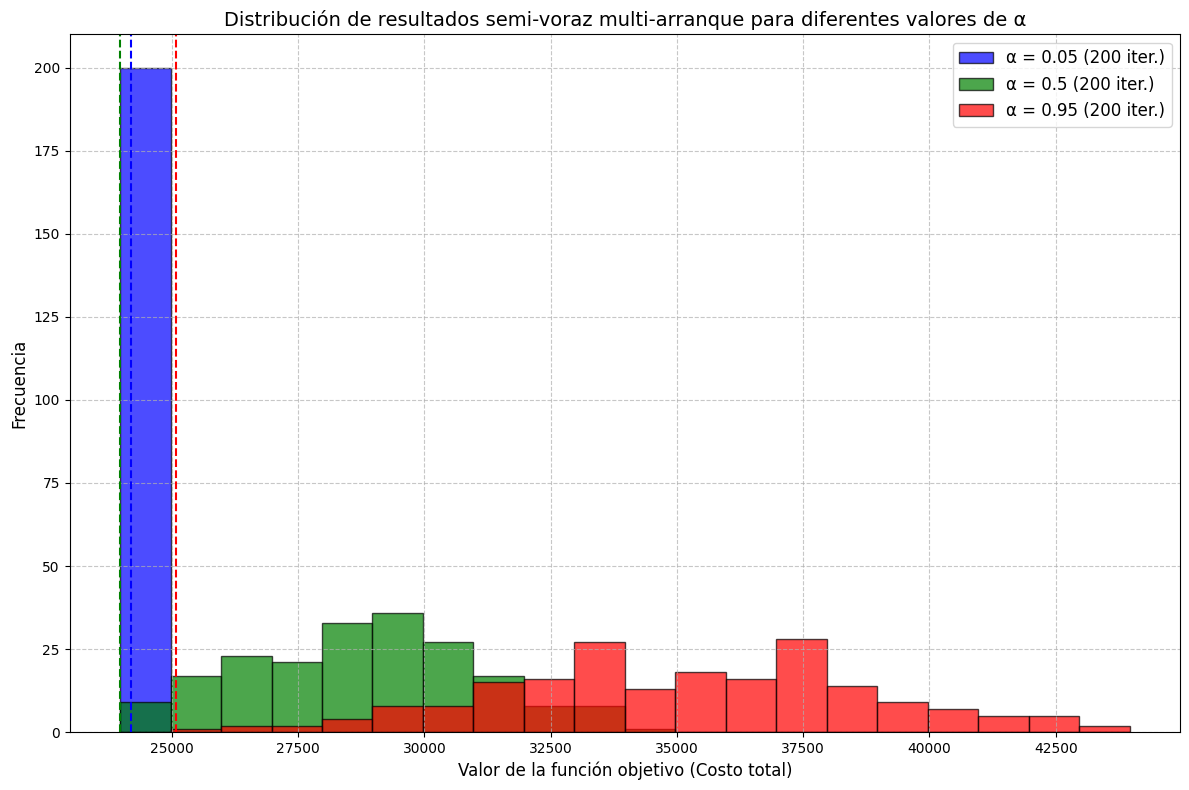


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 20, 26, 32, 47]
  Costo total: 23976
  Total de iteraciones: 55
  Tiempo de ejecución: 0.23 segundos
  Estadísticas de las 55 iteraciones:
    Mejor: 23976
    Peor: 24198
    Promedio: 24126.09
    Desviación porcentual: 0.00%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 20, 26, 32, 47]
  Costo total: 23976
  Total de iteraciones: 64
  Tiempo de ejecución: 0.39 segundos
  Estadísticas de las 64 iteraciones:
    Mejor: 23976
    Peor: 31020
    Promedio: 25049.38
    Desviación porcentual: 0.00%

Ejecutando algoritmo GRASP con alpha = 0.95:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 20, 32, 40, 47]
  Costo total: 24198
  Total de iteraciones: 63
  Tiempo de ejecución: 0.45 segundos
  Estadísticas de las 63 iteraciones:
    Mejor: 24198
    Peor: 31997
    Promedio: 261

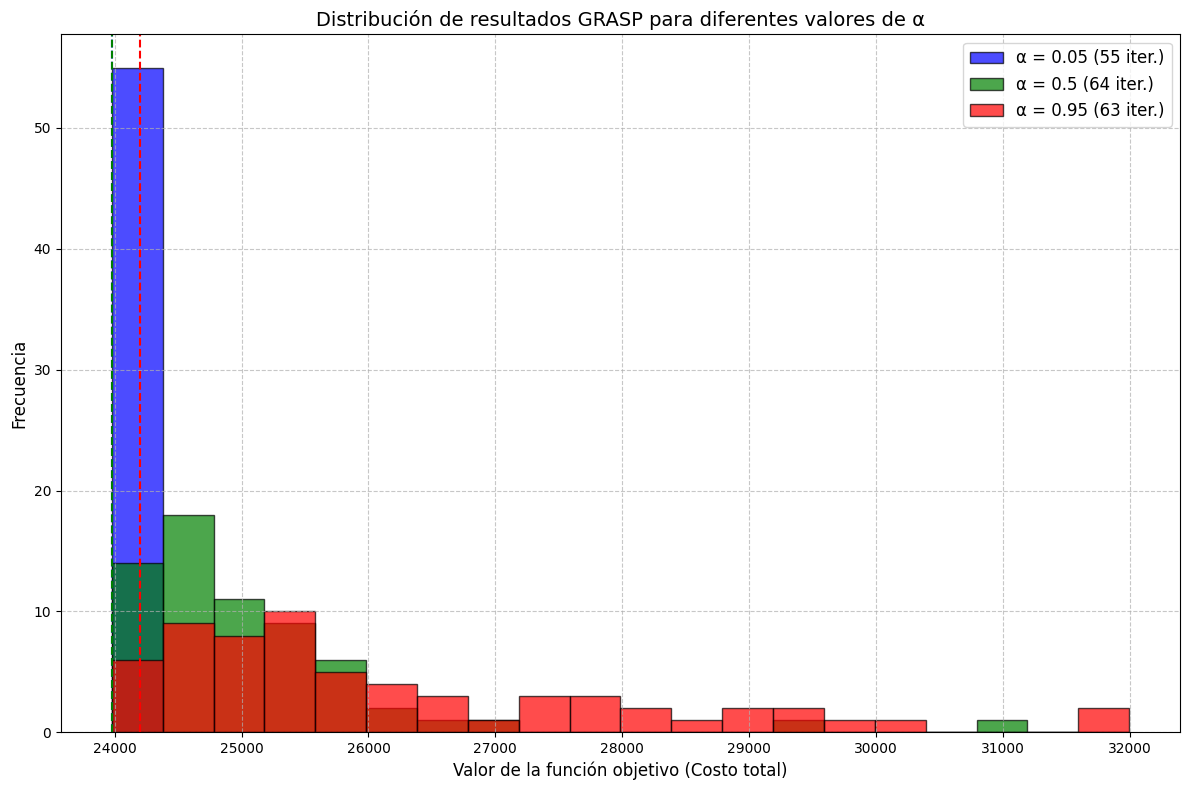


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo GRASP con alpha = 0.05:
  Instalaciones seleccionadas: [9, 20, 26, 32, 47]
  Costo total: 23976


In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-5.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-23976)/23976)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-23976)/23976)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 6

Problema con 250 ubicaciones potenciales y 250 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [10, 12, 19, 27, 30, 47, 51, 63, 64, 71, 80, 90, 97, 119, 123, 130, 137, 140, 145, 155, 166, 169, 170, 178, 186, 188, 203, 229, 232, 234, 236, 238, 246, 249]
  Costo total: 258182
  Número de iteraciones: 200
  Tiempo de ejecución: 35.53 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 258182
    Peor: 258838
    Promedio: 258454.80
    Desviación porcentual: 0.08%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 4, 5, 10, 17, 27, 47, 51, 60, 62, 69, 71, 82, 86, 93, 110, 119, 123, 132, 137, 143, 155, 160, 161, 163, 169, 172, 176, 177, 183, 187, 191, 208, 229, 232, 238, 246, 247]
  Costo total: 258834
  Número de iteraciones: 200
  Tiempo de ejecución: 41.26 segund

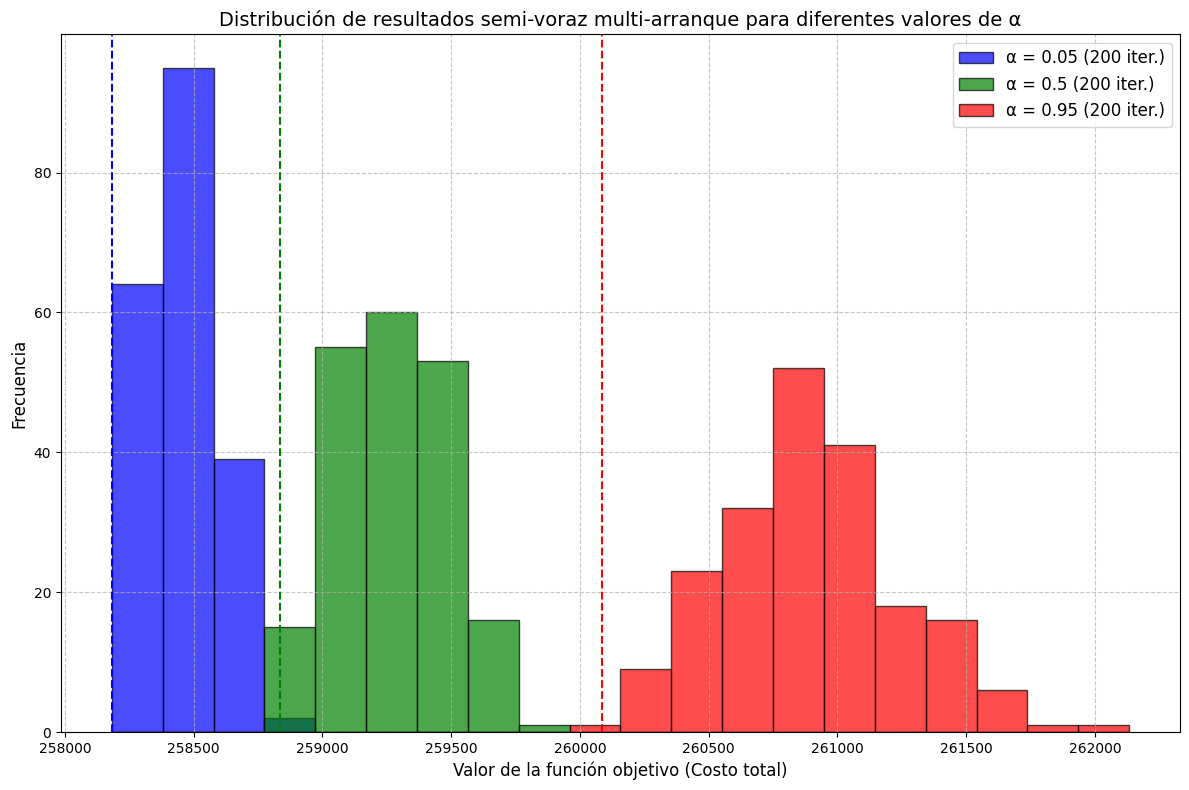


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [10, 12, 19, 40, 51, 64, 71, 80, 84, 90, 92, 97, 119, 130, 137, 140, 142, 145, 153, 166, 170, 178, 184, 186, 210, 216, 229, 232, 234, 236, 238, 242, 249]
  Costo total: 258216
  Total de iteraciones: 97
  Tiempo de ejecución: 17.77 segundos
  Estadísticas de las 97 iteraciones:
    Mejor: 258216
    Peor: 258849
    Promedio: 258463.73
    Desviación porcentual: 0.10%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [4, 5, 11, 12, 13, 19, 22, 27, 30, 51, 56, 63, 64, 67, 71, 97, 106, 109, 113, 121, 123, 126, 132, 136, 138, 145, 165, 169, 184, 193, 232, 234, 236, 238, 249]
  Costo total: 258670
  Total de iteraciones: 58
  Tiempo de ejecución: 12.36 segundos
  Estadísticas de las 58 iteraciones:
    Mejor: 258670
    Peor: 259643
    Promedio: 259215.33
    Desviación porcentual: 0.27%

Ejecutando algor

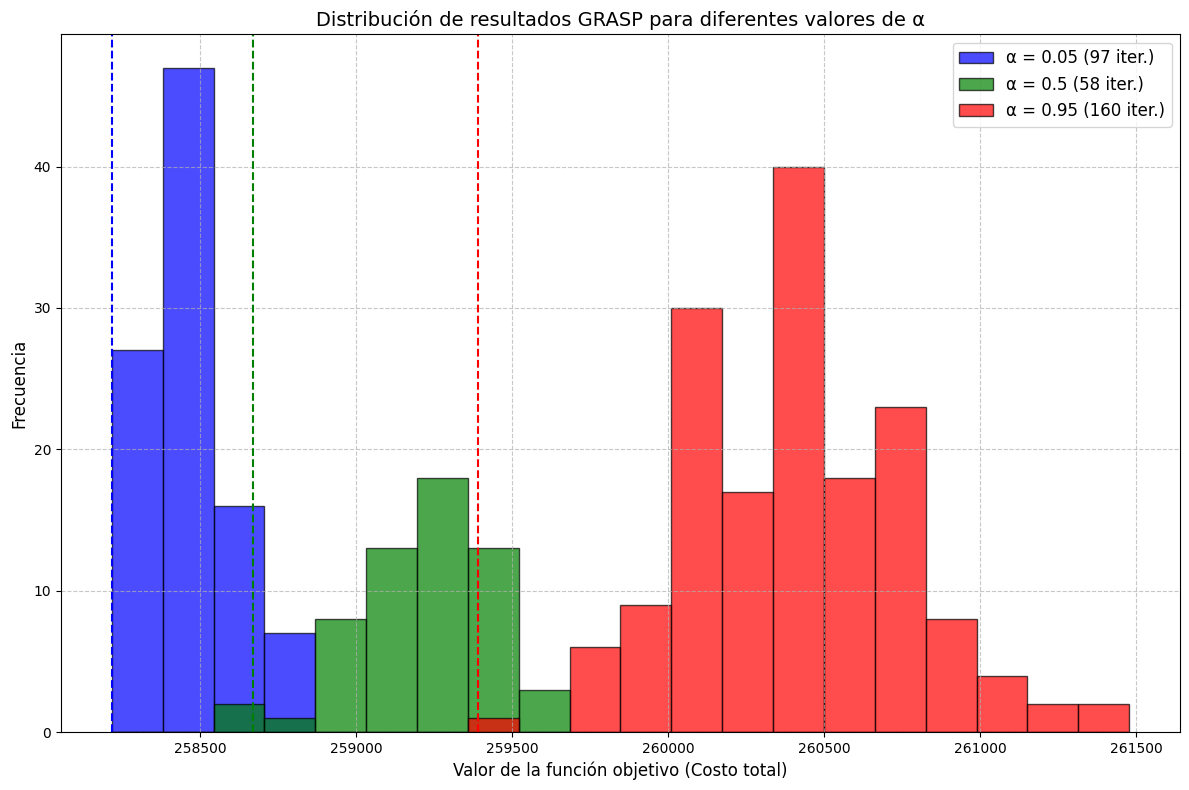


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo Semi-voraz multi-arranque con alpha = 0.05:
  Instalaciones seleccionadas: [10, 12, 19, 27, 30, 47, 51, 63, 64, 71, 80, 90, 97, 119, 123, 130, 137, 140, 145, 155, 166, 169, 170, 178, 186, 188, 203, 229, 232, 234, 236, 238, 246, 249]
  Costo total: 258182


In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-6.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257964)/257964)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257964)/257964)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 7

Problema con 250 ubicaciones potenciales y 250 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [3, 20, 32, 35, 37, 42, 46, 54, 68, 81, 93, 123, 137, 139, 141, 143, 144, 150, 159, 160, 163, 166, 168, 169, 193, 195, 208, 210, 226, 229, 237, 249]
  Costo total: 258382
  Número de iteraciones: 200
  Tiempo de ejecución: 37.07 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 258382
    Peor: 259275
    Promedio: 258776.33
    Desviación porcentual: 0.16%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [3, 9, 13, 19, 29, 31, 32, 35, 48, 50, 54, 65, 68, 69, 77, 82, 93, 97, 104, 106, 123, 127, 138, 139, 143, 144, 154, 157, 159, 165, 167, 168, 179, 207, 208, 221, 231, 237]
  Costo total: 258718
  Número de iteraciones: 200
  Tiempo de ejecución: 43.60 segundos
  Estadí

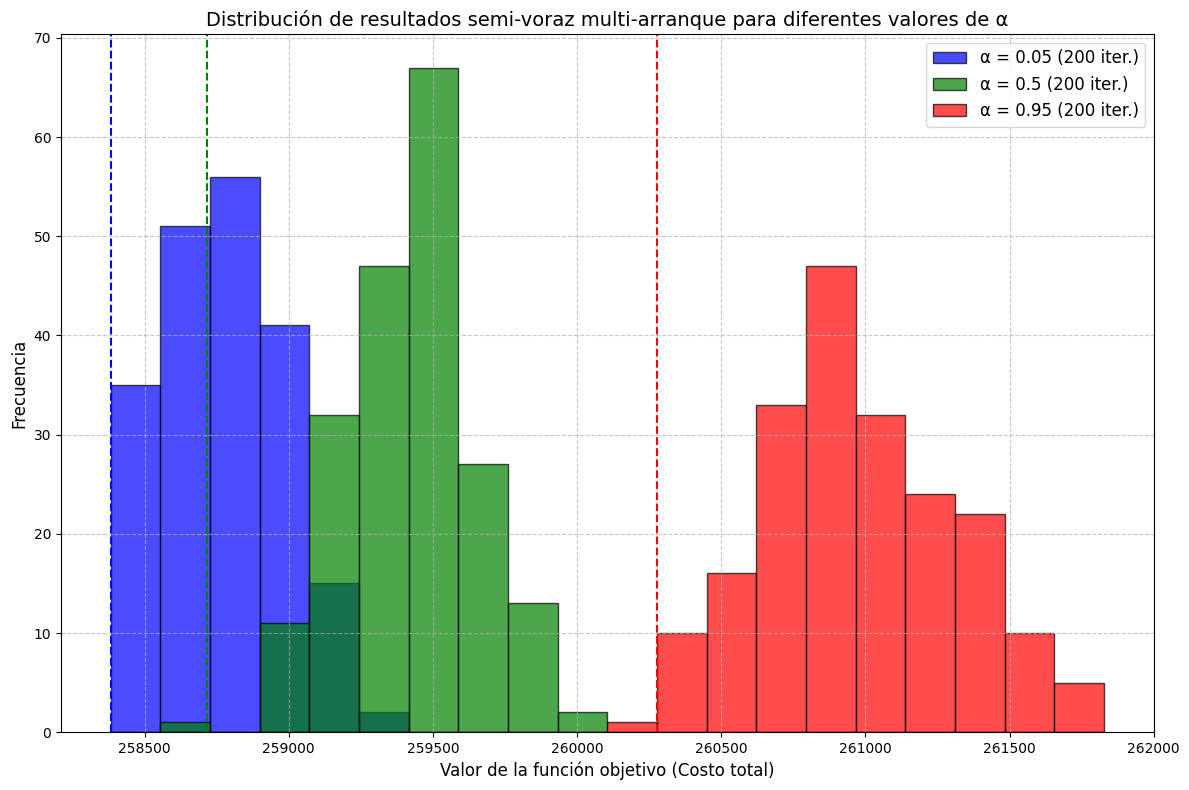


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [3, 9, 20, 31, 32, 46, 54, 68, 93, 123, 127, 137, 139, 141, 143, 144, 148, 157, 159, 163, 166, 168, 169, 193, 195, 208, 210, 213, 226, 229, 237, 249]
  Costo total: 258449
  Total de iteraciones: 55
  Tiempo de ejecución: 10.95 segundos
  Estadísticas de las 55 iteraciones:
    Mejor: 258449
    Peor: 259274
    Promedio: 258750.93
    Desviación porcentual: 0.19%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [1, 3, 4, 20, 31, 32, 35, 37, 49, 50, 54, 65, 77, 93, 104, 119, 139, 140, 143, 147, 151, 157, 159, 163, 164, 165, 167, 169, 179, 189, 193, 195, 205, 208, 213, 217, 221, 228, 237]
  Costo total: 258972
  Total de iteraciones: 58
  Tiempo de ejecución: 13.00 segundos
  Estadísticas de las 58 iteraciones:
    Mejor: 258972
    Peor: 259700
    Promedio: 259346.33
    Desviación porcentual: 0.39%


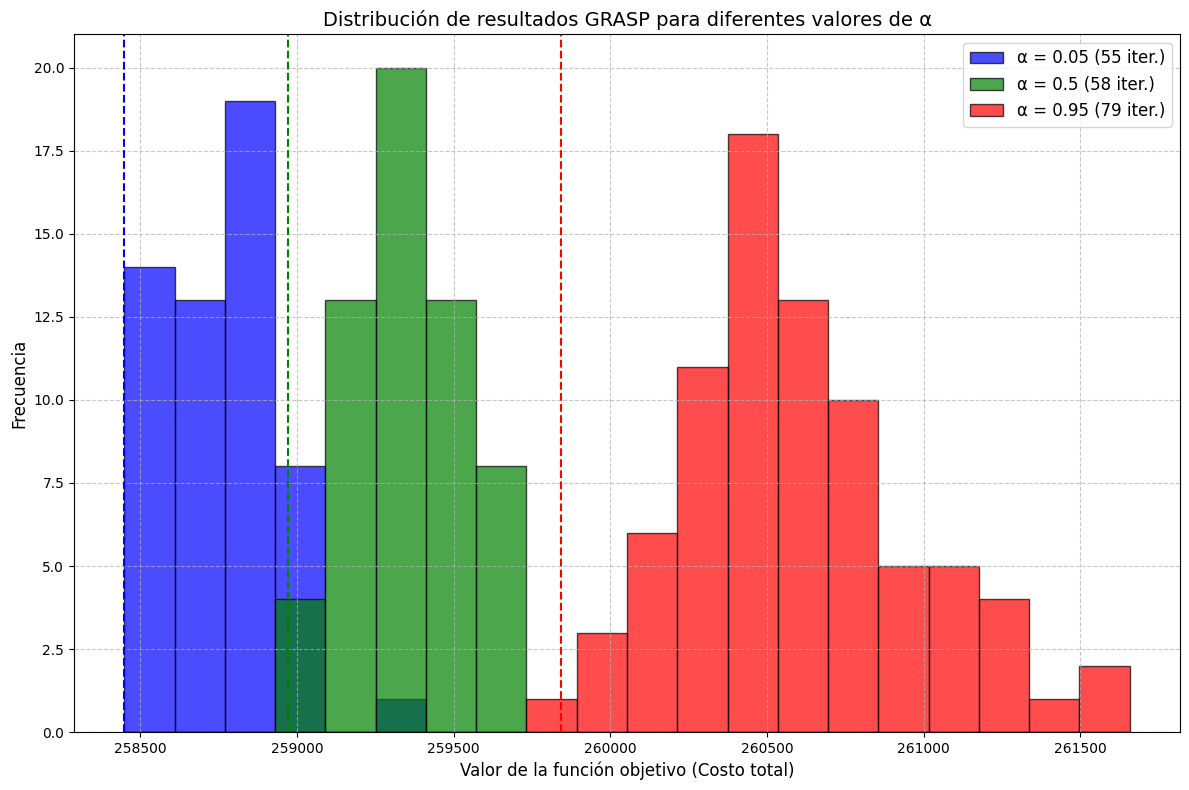


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo Semi-voraz multi-arranque con alpha = 0.05:
  Instalaciones seleccionadas: [3, 20, 32, 35, 37, 42, 46, 54, 68, 81, 93, 123, 137, 139, 141, 143, 144, 150, 159, 160, 163, 166, 168, 169, 193, 195, 208, 210, 226, 229, 237, 249]
  Costo total: 258382


In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-7.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257961)/257961)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257961)/257961)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 8

Problema con 250 ubicaciones potenciales y 250 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 33, 37, 38, 55, 57, 60, 64, 69, 71, 73, 91, 94, 102, 111, 132, 138, 139, 144, 146, 148, 162, 166, 172, 174, 177, 189, 190, 197, 199, 216, 220, 221, 234]
  Costo total: 257923
  Número de iteraciones: 200
  Tiempo de ejecución: 37.59 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 257923
    Peor: 258529
    Promedio: 258193.18
    Desviación porcentual: 0.12%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [2, 9, 10, 20, 32, 33, 34, 38, 49, 52, 55, 67, 69, 71, 72, 74, 80, 90, 91, 92, 94, 102, 124, 128, 130, 131, 138, 144, 166, 174, 177, 179, 190, 197, 204, 209, 210, 223, 229]
  Costo total: 258483
  Número de iteraciones: 200
  Tiempo de ejecución: 44.12 segundo

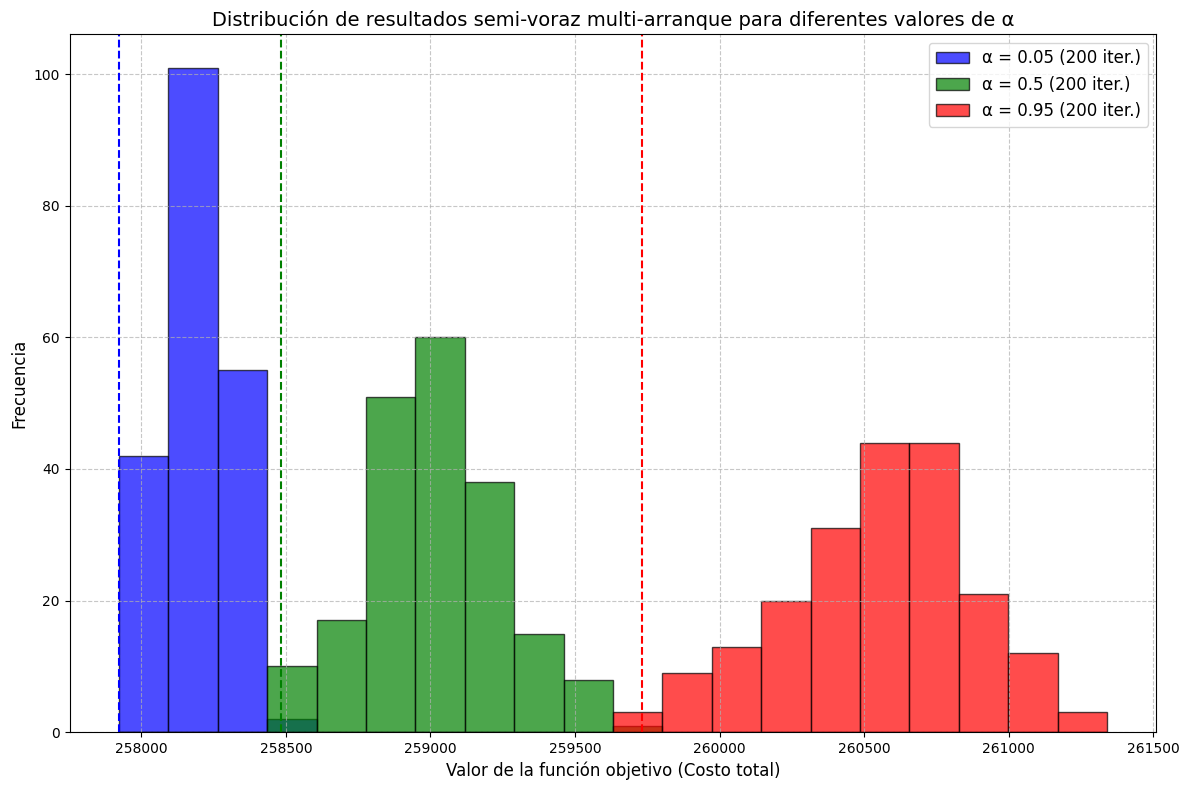


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [34, 37, 40, 52, 55, 60, 67, 69, 71, 94, 131, 132, 137, 138, 139, 144, 146, 148, 162, 166, 172, 176, 177, 179, 182, 204, 213, 216, 220, 223, 229, 233]
  Costo total: 257928
  Total de iteraciones: 56
  Tiempo de ejecución: 12.11 segundos
  Estadísticas de las 56 iteraciones:
    Mejor: 257928
    Peor: 258491
    Promedio: 258169.79
    Desviación porcentual: 0.12%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [20, 26, 32, 33, 38, 60, 62, 64, 67, 69, 71, 72, 91, 97, 103, 110, 131, 132, 139, 144, 146, 152, 166, 172, 174, 179, 186, 188, 189, 197, 213, 223, 229, 234, 243]
  Costo total: 258496
  Total de iteraciones: 73
  Tiempo de ejecución: 20.55 segundos
  Estadísticas de las 73 iteraciones:
    Mejor: 258496
    Peor: 259301
    Promedio: 258916.71
    Desviación porcentual: 0.34%

Ejecutando algo

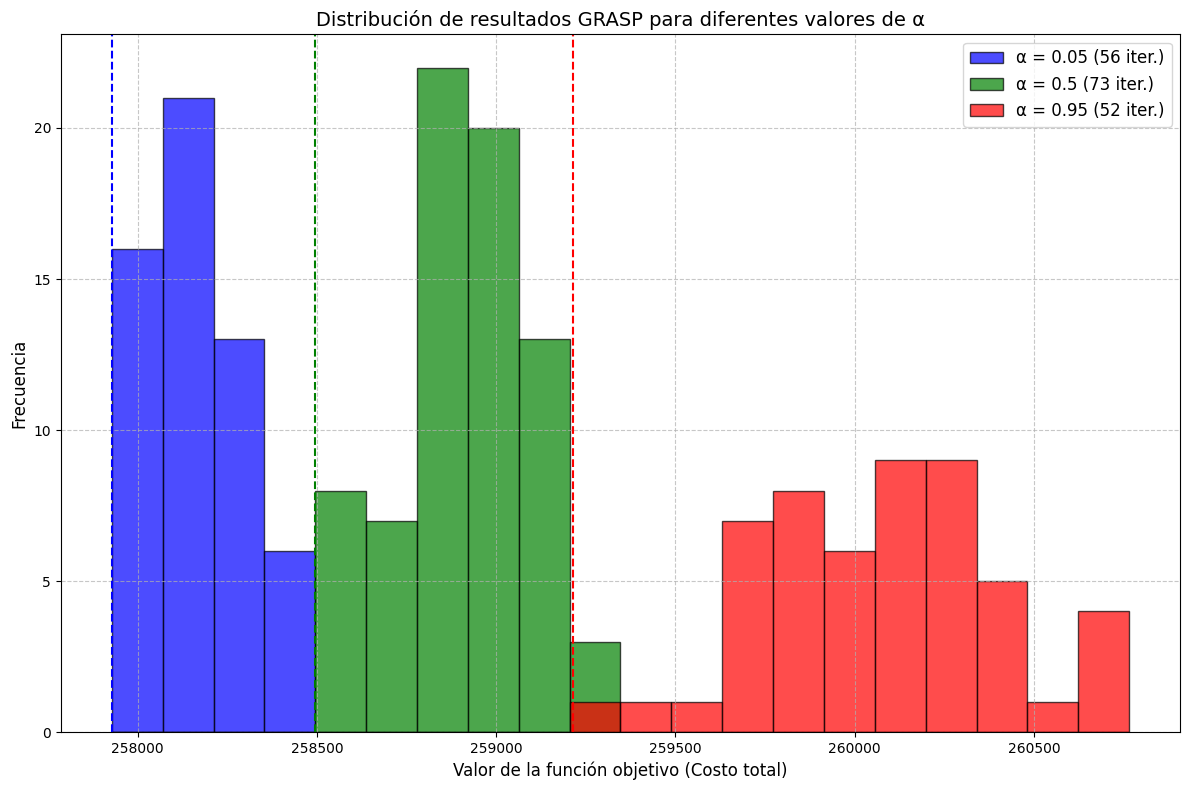


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo Semi-voraz multi-arranque con alpha = 0.05:
  Instalaciones seleccionadas: [9, 33, 37, 38, 55, 57, 60, 64, 69, 71, 73, 91, 94, 102, 111, 132, 138, 139, 144, 146, 148, 162, 166, 172, 174, 177, 189, 190, 197, 199, 216, 220, 221, 234]
  Costo total: 257923


In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-8.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257626)/257626)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257626)/257626)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 9

Problema con 250 ubicaciones potenciales y 250 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [4, 17, 24, 25, 40, 43, 46, 52, 74, 76, 77, 87, 88, 92, 95, 96, 98, 101, 120, 130, 139, 147, 154, 155, 160, 161, 166, 184, 191, 198, 234, 241, 250]
  Costo total: 257988
  Número de iteraciones: 200
  Tiempo de ejecución: 39.15 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 257988
    Peor: 258721
    Promedio: 258258.42
    Desviación porcentual: 0.16%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [10, 24, 25, 28, 40, 43, 46, 52, 55, 69, 71, 74, 77, 85, 87, 89, 96, 100, 101, 113, 119, 120, 138, 139, 147, 151, 160, 161, 162, 165, 166, 184, 220, 241, 245, 250]
  Costo total: 258436
  Número de iteraciones: 200
  Tiempo de ejecución: 42.14 segundos
  Estadísticas d

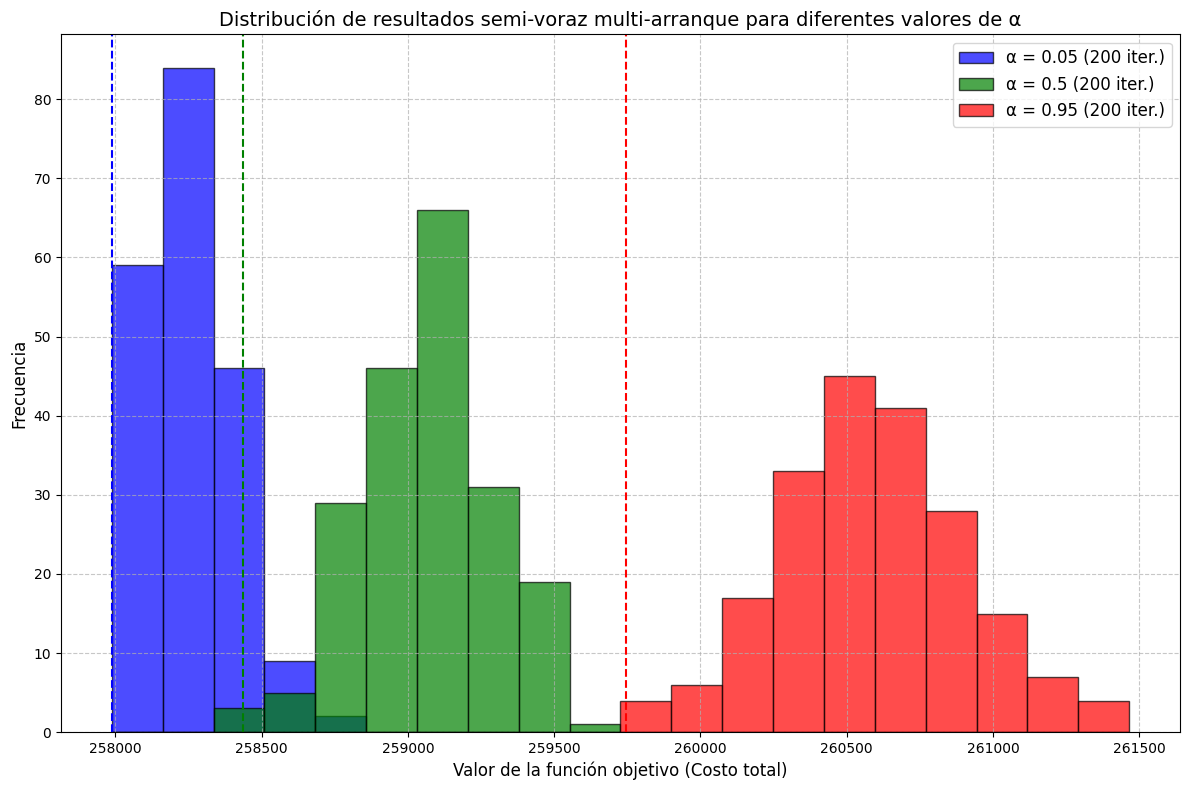


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [3, 4, 16, 24, 25, 37, 43, 46, 52, 65, 77, 87, 88, 95, 96, 99, 101, 114, 120, 130, 139, 147, 152, 154, 160, 161, 164, 165, 166, 184, 241, 245, 250]
  Costo total: 257981
  Total de iteraciones: 104
  Tiempo de ejecución: 19.35 segundos
  Estadísticas de las 104 iteraciones:
    Mejor: 257981
    Peor: 258806
    Promedio: 258240.67
    Desviación porcentual: 0.16%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 24, 36, 39, 43, 44, 46, 52, 59, 77, 79, 86, 87, 89, 96, 98, 119, 120, 144, 150, 154, 160, 161, 165, 166, 174, 179, 184, 187, 191, 201, 208, 218, 241, 244, 247, 249, 250]
  Costo total: 258423
  Total de iteraciones: 63
  Tiempo de ejecución: 13.72 segundos
  Estadísticas de las 63 iteraciones:
    Mejor: 258423
    Peor: 259580
    Promedio: 258942.08
    Desviación porcentual: 0.33%

Ejec

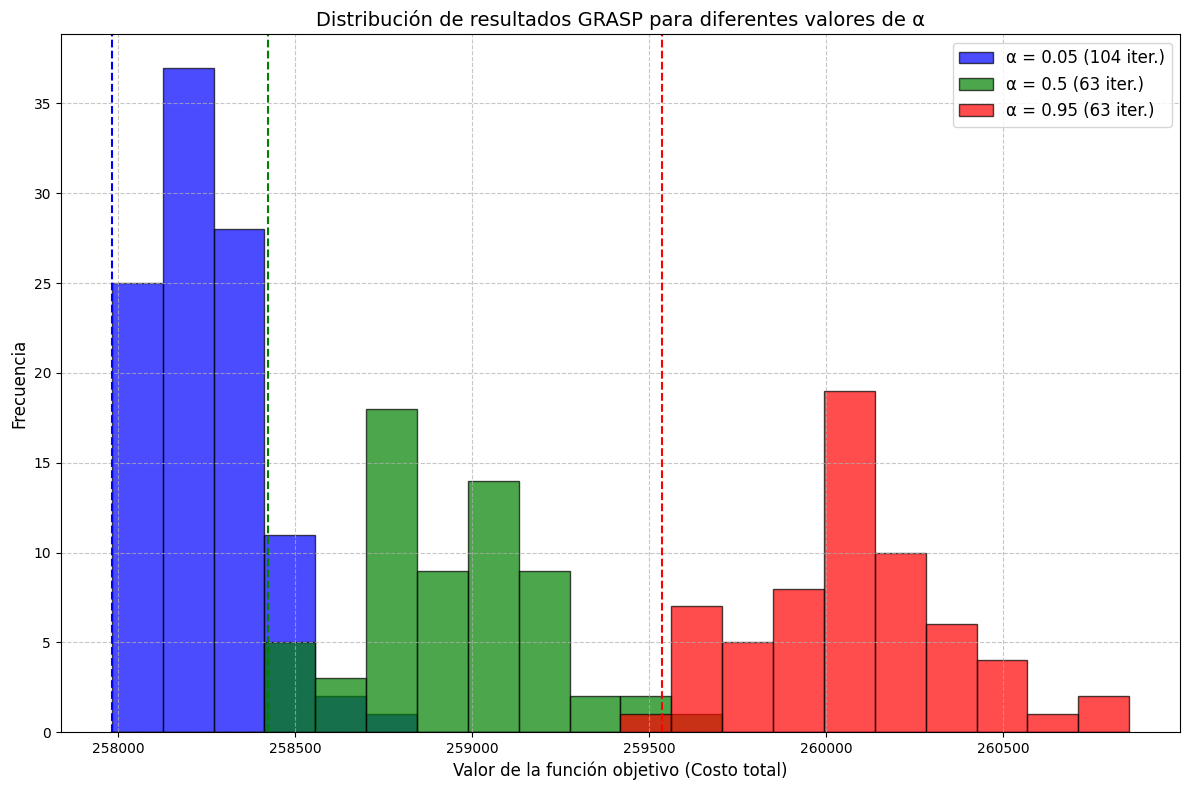


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo GRASP con alpha = 0.05:
  Instalaciones seleccionadas: [3, 4, 16, 24, 25, 37, 43, 46, 52, 65, 77, 87, 88, 95, 96, 99, 101, 114, 120, 130, 139, 147, 152, 154, 160, 161, 164, 165, 166, 184, 241, 245, 250]
  Costo total: 257981


In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-9.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257573)/257573)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257573)/257573)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()

## Instancia 10

Problema con 250 ubicaciones potenciales y 250 puntos de demanda

PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 15, 18, 33, 38, 47, 49, 62, 84, 89, 100, 110, 114, 118, 120, 122, 124, 133, 137, 166, 172, 204, 206, 207, 209, 212, 214, 223, 227, 230, 234, 240, 250]
  Costo total: 258159
  Número de iteraciones: 200
  Tiempo de ejecución: 37.55 segundos
  Estadísticas de las 200 iteraciones:
    Mejor: 258159
    Peor: 258841
    Promedio: 258478.36
    Desviación porcentual: 0.10%

Ejecutando algoritmo semi-voraz multi-arranque con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [6, 14, 15, 18, 36, 38, 49, 53, 87, 89, 98, 100, 105, 111, 112, 115, 122, 133, 137, 138, 141, 160, 166, 168, 192, 194, 199, 200, 204, 209, 212, 214, 223, 228, 237, 240, 242]
  Costo total: 258639
  Número de iteraciones: 200
  Tiempo de ejecución: 44.13 segundos

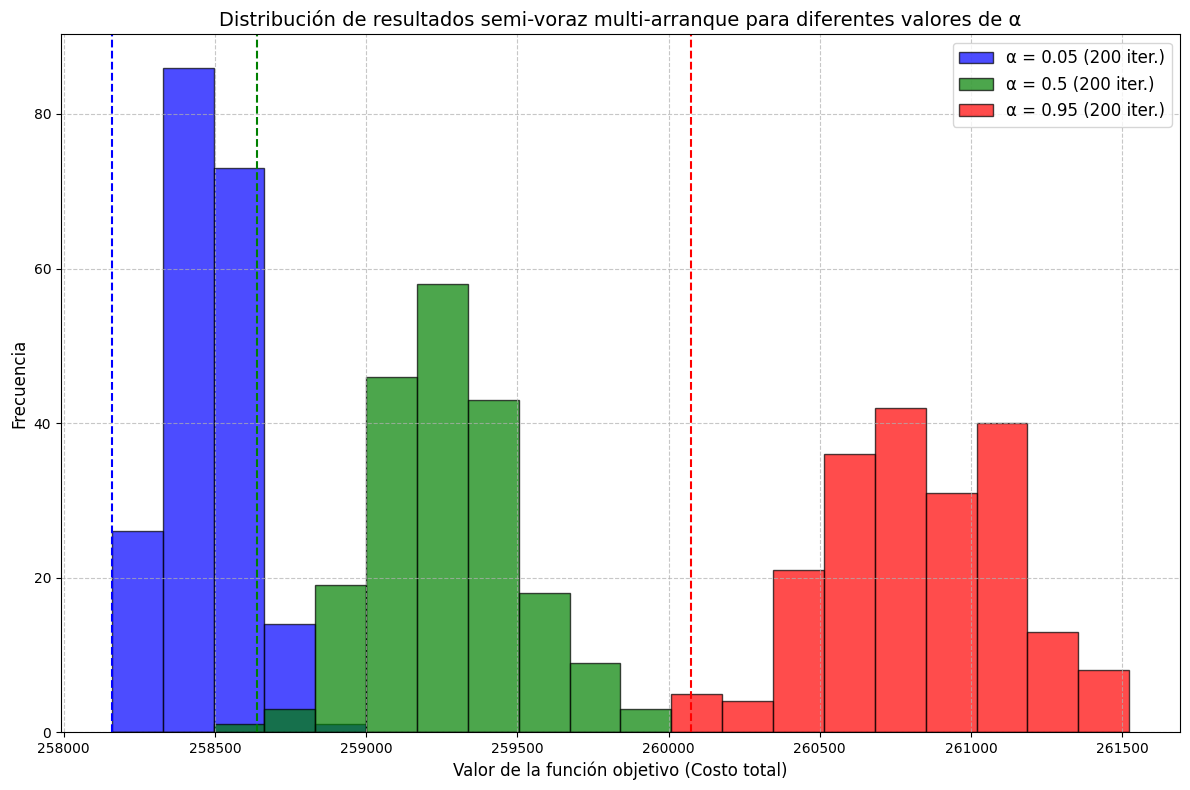


PARTE 2: ALGORITMO GRASP

Ejecutando algoritmo GRASP con alpha = 0.05:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [9, 15, 18, 38, 47, 49, 53, 62, 77, 81, 87, 89, 98, 114, 116, 118, 120, 122, 124, 133, 156, 166, 168, 169, 172, 204, 206, 212, 217, 223, 228, 230, 250]
  Costo total: 258168
  Total de iteraciones: 139
  Tiempo de ejecución: 26.69 segundos
  Estadísticas de las 139 iteraciones:
    Mejor: 258168
    Peor: 258726
    Promedio: 258473.07
    Desviación porcentual: 0.11%

Ejecutando algoritmo GRASP con alpha = 0.5:
  Mejor solución encontrada:
  Instalaciones seleccionadas: [4, 18, 24, 27, 33, 38, 49, 53, 59, 68, 77, 79, 83, 89, 90, 98, 114, 116, 122, 124, 131, 133, 156, 166, 168, 172, 177, 198, 204, 207, 209, 212, 213, 223, 228, 230, 245, 250]
  Costo total: 258640
  Total de iteraciones: 213
  Tiempo de ejecución: 48.20 segundos
  Estadísticas de las 213 iteraciones:
    Mejor: 258640
    Peor: 259683
    Promedio: 259173.74
    Desviación porcentual: 0.29%

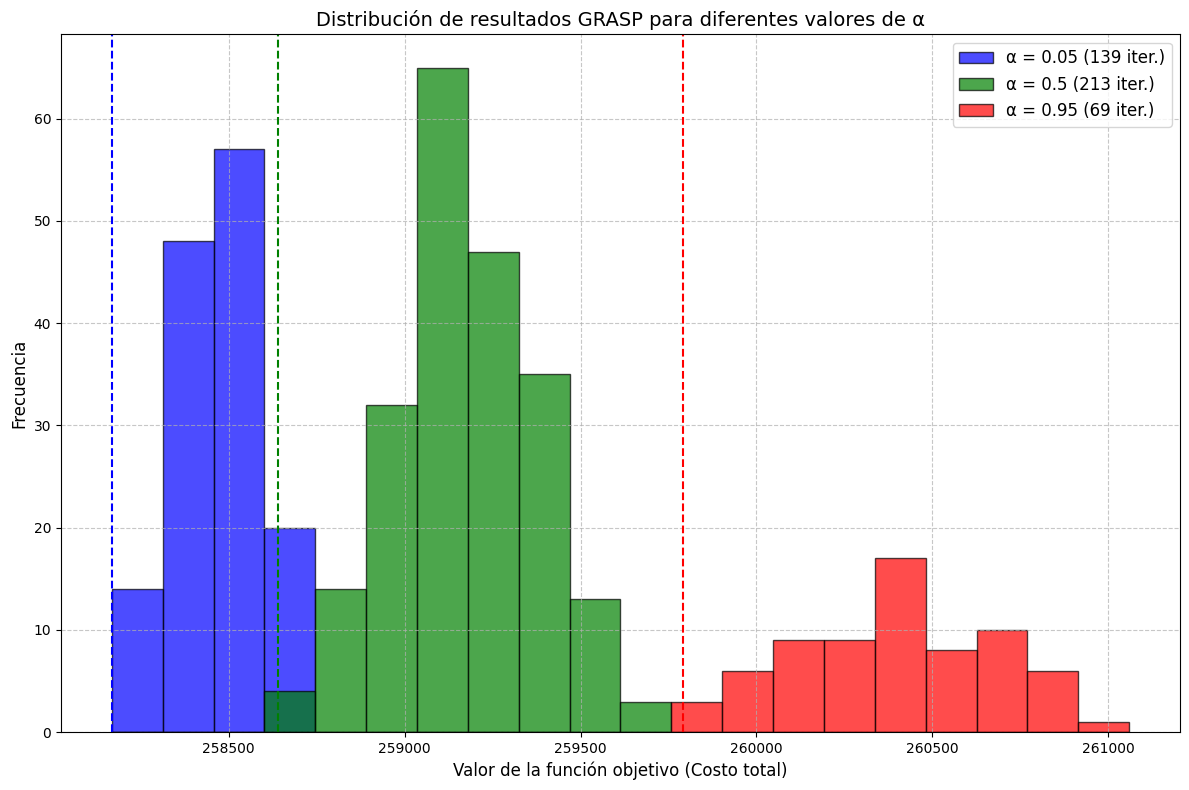


MEJOR SOLUCIÓN GLOBAL
La mejor solución global fue encontrada por el algoritmo Semi-voraz multi-arranque con alpha = 0.05:
  Instalaciones seleccionadas: [9, 15, 18, 33, 38, 47, 49, 62, 84, 89, 100, 110, 114, 118, 120, 122, 124, 133, 137, 166, 172, 204, 206, 207, 209, 212, 214, 223, 227, 230, 234, 240, 250]
  Costo total: 258159


In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Cargar datos del archivo
def cargar_datos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    n, m = map(int, lineas[0].split())

    f_j = [0] * (n + 1)
    c_ij = [[0] * (n + 1) for _ in range(m + 1)]

    for j in range(1, n + 1):
        datos = list(map(int, lineas[j].split()))
        idx = datos[0]
        f_j[idx] = datos[1]
        
        for i in range(1, m + 1):
            c_ij[i][idx] = datos[i + 1]
            
    return n, m, f_j, c_ij

# Implementación del algoritmo ADD original (como en el pseudocódigo)
def algoritmo_add(n, m, f_j, c_ij):
    """
    Implementación del Algoritmo 1: ADD heuristic for the UFLP
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos la ubicación con menor costo inicial
    j_estrella = 1
    for j in range(2, n + 1):
        if g[j] < g[j_estrella]:
            j_estrella = j

    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Encontramos la mejor ubicación para añadir
        mejor_j = -1
        mejor_g = float('-inf')
        for j in range(1, n + 1):
            if j not in J_estrella and g[j] > mejor_g:
                mejor_j = j
                mejor_g = g[j]
        
        # Si no hay mejora o no hay candidatos, salimos
        if mejor_j == -1 or mejor_g <= 0:
            break
        
        j_estrella = mejor_j
        J_estrella.add(j_estrella)
        
        # Actualizamos las asignaciones
        for i in range(1, m + 1):
            if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                alloc_i[i] = j_estrella
        
        f = f - mejor_g

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación del algoritmo semi-voraz (basado en ADD)
def algoritmo_semivoraz(n, m, f_j, c_ij, alpha):
    """
    Algoritmo semi-voraz basado en el algoritmo ADD pero usando una lista restringida
    de candidatos determinada por el parámetro alpha.
    """
    # Conjunto de ubicaciones seleccionadas
    J_estrella = set()
    # Asignación de cada punto de demanda a una ubicación
    alloc_i = [0] * (m + 1)

    # Costo total de la solución
    f = 0

    # Función voraz inicial
    g = [0] * (n + 1)
    for j in range(1, n + 1):
        g[j] = sum(c_ij[i][j] for i in range(1, m + 1)) + f_j[j]

    # Encontramos el mejor y peor valor de g
    mejor_j = 1
    peor_j = 1
    for j in range(2, n + 1):
        if g[j] < g[mejor_j]:
            mejor_j = j
        if g[j] > g[peor_j]:
            peor_j = j
    
    g_min = g[mejor_j]
    g_max = g[peor_j]
    
    # Construimos la lista restringida de candidatos (lista_candidatos)
    umbral = g_min + alpha * (g_max - g_min)
    lista_candidatos = [j for j in range(1, n + 1) if g[j] <= umbral]
    
    # Seleccionamos aleatoriamente un elemento de la lista_candidatos
    j_estrella = random.choice(lista_candidatos)
    
    # Añadimos la primera ubicación
    J_estrella.add(j_estrella)
    for i in range(1, m + 1):
        alloc_i[i] = j_estrella
    f = g[j_estrella]

    # Iteramos añadiendo más ubicaciones
    while True:
        g = [0] * (n + 1)
        for j in range(1, n + 1):
            if j not in J_estrella:
                suma = 0
                for i in range(1, m + 1):
                    diferencia = c_ij[i][alloc_i[i]] - c_ij[i][j]
                    if diferencia > 0:
                        suma += diferencia
                g[j] = suma - f_j[j]
        
        # Construimos la lista de candidatos que dan mejora
        candidatos = [j for j in range(1, n + 1) if j not in J_estrella and g[j] > 0]
        if not candidatos:
            break
        
        # Encontramos el mejor y peor candidato
        g_candidatos = [g[j] for j in candidatos]
        if not g_candidatos:
            break
            
        g_min = min(g_candidatos)
        g_max = max(g_candidatos)
        
        # Construimos la lista_candidatos (para maximizar ahora)
        if g_min == g_max:  # Si todos tienen el mismo valor
            lista_candidatos = candidatos
        else:
            umbral = g_max - alpha * (g_max - g_min)
            lista_candidatos = [j for j in candidatos if g[j] >= umbral]
        
        # Seleccionamos aleatoriamente un elemento de la lista_candidatos
        if lista_candidatos:
            j_estrella = random.choice(lista_candidatos)
            J_estrella.add(j_estrella)
            
            # Actualizamos las asignaciones
            for i in range(1, m + 1):
                if c_ij[i][j_estrella] < c_ij[i][alloc_i[i]]:
                    alloc_i[i] = j_estrella
            
            f = f - g[j_estrella]
        else:
            break

    # Calculamos el costo total
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_total = costo_fijo + costo_asignacion

    return J_estrella, alloc_i, costo_total

# Implementación de la búsqueda local optimizada
def busqueda_local(J_estrella, alloc_i, n, m, f_j, c_ij):
    """
    Fase de búsqueda local optimizada para mejorar la solución inicial.
    Esta versión es mucho más rápida limitando el número de iteraciones
    y explorando un subconjunto de las opciones posibles.
    """
    # Calculamos el costo inicial
    costo_fijo = sum(f_j[j] for j in J_estrella)
    costo_asignacion = sum(c_ij[i][alloc_i[i]] for i in range(1, m + 1))
    costo_actual = costo_fijo + costo_asignacion
    
    # Convertimos el conjunto a lista para indexar
    J_estrella = list(J_estrella)
    mejora = True
    max_iteraciones = 20  # Limitamos el número máximo de iteraciones
    iteracion = 0
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Elegimos un subconjunto aleatorio de instalaciones para quitar
        random.shuffle(J_estrella)
        j_quitar_list = J_estrella[:min(5, len(J_estrella))]
        
        for j_quitar in j_quitar_list:
            if len(J_estrella) <= 1:
                break
                
            # Elegimos un subconjunto aleatorio de instalaciones para añadir
            j_añadir_candidates = [j for j in range(1, n + 1) if j not in J_estrella]
            random.shuffle(j_añadir_candidates)
            j_añadir_list = j_añadir_candidates[:min(10, len(j_añadir_candidates))]
            
            for j_añadir in j_añadir_list:
                temp_J_estrella = J_estrella.copy()
                temp_J_estrella.remove(j_quitar)
                temp_J_estrella.append(j_añadir)
                temp_alloc_i = alloc_i.copy()
                
                # Reasignamos los puntos de demanda
                for i in range(1, m + 1):
                    if temp_alloc_i[i] == j_quitar:
                        # Buscamos la mejor instalación disponible
                        mejor_j = temp_J_estrella[0]
                        mejor_costo = c_ij[i][mejor_j]
                        
                        for j in temp_J_estrella[1:]:
                            if c_ij[i][j] < mejor_costo:
                                mejor_costo = c_ij[i][j]
                                mejor_j = j
                        
                        temp_alloc_i[i] = mejor_j
                    # Verificamos si la nueva instalación mejora la asignación actual
                    elif c_ij[i][j_añadir] < c_ij[i][temp_alloc_i[i]]:
                        temp_alloc_i[i] = j_añadir
                
                nuevo_costo_fijo = sum(f_j[j] for j in temp_J_estrella)
                nuevo_costo_asignacion = sum(c_ij[i][temp_alloc_i[i]] for i in range(1, m + 1))
                nuevo_costo = nuevo_costo_fijo + nuevo_costo_asignacion
                
                if nuevo_costo < costo_actual:
                    J_estrella = temp_J_estrella
                    alloc_i = temp_alloc_i
                    costo_actual = nuevo_costo
                    mejora = True
                    break
                    
            if mejora:
                break
    
    # Convertimos de vuelta a conjunto antes de retornar
    return set(J_estrella), alloc_i, costo_actual

# Algoritmo semi-voraz multi-arranque
def algoritmo_semivoraz_multiarranque(n, m, f_j, c_ij, alpha, num_iteraciones=200):
    """
    Algoritmo semi-voraz multi-arranque con al menos 200 iteraciones.
    """
    mejor_costo = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos al menos 200 iteraciones
    for _ in range(num_iteraciones):
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_total = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_total)
        
        # Actualizamos la mejor solución
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_J_estrella = J_estrella.copy()
            mejor_alloc_i = alloc_i.copy()
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados

# Algoritmo GRASP completo
def algoritmo_grasp(n, m, f_j, c_ij, alpha, max_iter_sin_mejora=50):
    """
    Algoritmo GRASP completo con criterio de terminación de 50 iteraciones sin mejora.
    """
    mejor_costo_global = float('inf')
    mejor_J_estrella = None
    mejor_alloc_i = None
    
    # Contador de iteraciones sin mejora
    iter_sin_mejora = 0
    total_iteraciones = 0
    
    # Lista para almacenar todos los resultados para histograma
    resultados = []
    
    # Ejecutamos mientras no hayamos alcanzado el criterio de terminación
    while iter_sin_mejora < max_iter_sin_mejora:
        total_iteraciones += 1
        
        # Fase constructiva semi-voraz
        J_estrella, alloc_i, costo_constructivo = algoritmo_semivoraz(n, m, f_j, c_ij, alpha)
        
        # Fase de mejora con búsqueda local
        J_estrella_mejorado, alloc_i_mejorado, costo_mejorado = busqueda_local(
            J_estrella, alloc_i, n, m, f_j, c_ij)
        
        # Guardamos el costo para el histograma
        resultados.append(costo_mejorado)
        
        # Verificamos si hay una mejora en la mejor solución global
        if costo_mejorado < mejor_costo_global:
            mejor_costo_global = costo_mejorado
            mejor_J_estrella = J_estrella_mejorado.copy()
            mejor_alloc_i = alloc_i_mejorado.copy()
            iter_sin_mejora = 0  # Reiniciamos el contador
        else:
            iter_sin_mejora += 1
    
    return mejor_J_estrella, mejor_alloc_i, mejor_costo_global, resultados, total_iteraciones

# Función para crear los histogramas
def crear_histogramas(resultados_por_alpha, valores_alpha, nombre_algoritmo, num_iteraciones):
    plt.figure(figsize=(12, 8))
    
    colores = ['blue', 'green', 'red']
    etiquetas = [f'α = {alpha} ({num_iteraciones[i]} iter.)' for i, alpha in enumerate(valores_alpha)]
    
    # Encontramos los límites para los bins
    todos_valores = []
    for resultados in resultados_por_alpha:
        todos_valores.extend(resultados)
    
    min_valor = min(todos_valores)
    max_valor = max(todos_valores)
    
    # Creamos bins comunes para todos los histogramas
    bin_range = max_valor - min_valor
    num_bins = 20
    bin_size = bin_range / num_bins if bin_range > 0 else 1
    bins = [min_valor + i * bin_size for i in range(num_bins + 1)]
    
    # Creamos los histogramas
    for i, resultados in enumerate(resultados_por_alpha):
        plt.hist(resultados, bins=bins, alpha=0.7, 
                 color=colores[i], label=etiquetas[i], edgecolor='black')
    
    plt.title(f'Distribución de resultados {nombre_algoritmo} para diferentes valores de α', fontsize=14)
    plt.xlabel('Valor de la función objetivo (Costo total)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Añadimos líneas verticales para los mejores valores de cada α
    for i, resultados in enumerate(resultados_por_alpha):
        mejor_valor = min(resultados)
        plt.axvline(x=mejor_valor, color=colores[i], linestyle='--', 
                    label=f'Mejor valor para α={valores_alpha[i]}: {mejor_valor}')
    
    plt.tight_layout()
    plt.savefig(f'histograma_{nombre_algoritmo}.png')
    plt.show()

# Función principal
def main():
    # Cargar datos del archivo (cambiar según la instancia que quieras usar)
    nombre_archivo = "UFLP-10.txt"
    n, m, f_j, c_ij = cargar_datos(nombre_archivo)
    
    print(f"Problema con {n} ubicaciones potenciales y {m} puntos de demanda")
    
    # Valores de alpha a probar
    alphas = [0.05, 0.50, 0.95]
    
    # =====================================================================
    # PARTE 1: Heurística semi-voraz multi-arranque
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 1: HEURÍSTICA SEMI-VORAZ MULTI-ARRANQUE")
    print("="*80)
    
    resultados_multiarranque = []
    mejores_soluciones_multiarranque = []
    num_iter_multiarranque = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo semi-voraz multi-arranque con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados = algoritmo_semivoraz_multiarranque(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_multiarranque.append(resultados)
        mejores_soluciones_multiarranque.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_multiarranque.append(len(resultados))
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Número de iteraciones: {len(resultados)}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257896)/257896)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo semi-voraz multi-arranque
    crear_histogramas(resultados_multiarranque, alphas, "semi-voraz multi-arranque", num_iter_multiarranque)
    
    # =====================================================================
    # PARTE 2: Algoritmo GRASP
    # =====================================================================
    print("\n" + "="*80)
    print("PARTE 2: ALGORITMO GRASP")
    print("="*80)
    
    resultados_grasp = []
    mejores_soluciones_grasp = []
    num_iter_grasp = []
    
    for alpha in alphas:
        print(f"\nEjecutando algoritmo GRASP con alpha = {alpha}:")
        
        # Medimos el tiempo de ejecución
        inicio = time.time()
        mejor_J_estrella, mejor_alloc_i, mejor_costo, resultados, total_iter = algoritmo_grasp(
            n, m, f_j, c_ij, alpha)
        fin = time.time()
        
        resultados_grasp.append(resultados)
        mejores_soluciones_grasp.append((mejor_J_estrella, mejor_alloc_i, mejor_costo))
        num_iter_grasp.append(total_iter)
        
        # Mostramos los resultados
        print(f"  Mejor solución encontrada:")
        print(f"  Instalaciones seleccionadas: {sorted(mejor_J_estrella)}")
        print(f"  Costo total: {mejor_costo}")
        print(f"  Total de iteraciones: {total_iter}")
        print(f"  Tiempo de ejecución: {fin - inicio:.2f} segundos")
        
        # Estadísticas básicas
        print(f"  Estadísticas de las {len(resultados)} iteraciones:")
        print(f"    Mejor: {min(resultados)}")
        print(f"    Peor: {max(resultados)}")
        print(f"    Promedio: {sum(resultados)/len(resultados):.2f}")
        print(f"    Desviación porcentual: {((min(resultados)-257896)/257896)*100:.2f}%")
    
    # Generamos el histograma para el algoritmo GRASP
    crear_histogramas(resultados_grasp, alphas, "GRASP", num_iter_grasp)
    
    # =====================================================================
    # Mejor solución global
    # =====================================================================
    print("\n" + "="*80)
    print("MEJOR SOLUCIÓN GLOBAL")
    print("="*80)
    
    # Comparamos las mejores soluciones de ambos algoritmos
    mejor_costo_multiarranque = min([solucion[2] for solucion in mejores_soluciones_multiarranque])
    mejor_costo_grasp = min([solucion[2] for solucion in mejores_soluciones_grasp])
    
    if mejor_costo_grasp <= mejor_costo_multiarranque:
        mejor_algo = "GRASP"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_grasp].index(mejor_costo_grasp)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_grasp[mejor_idx]
    else:
        mejor_algo = "Semi-voraz multi-arranque"
        mejor_idx = [solucion[2] for solucion in mejores_soluciones_multiarranque].index(mejor_costo_multiarranque)
        mejor_alpha = alphas[mejor_idx]
        mejor_solucion = mejores_soluciones_multiarranque[mejor_idx]
    
    print(f"La mejor solución global fue encontrada por el algoritmo {mejor_algo} con alpha = {mejor_alpha}:")
    print(f"  Instalaciones seleccionadas: {sorted(mejor_solucion[0])}")
    print(f"  Costo total: {mejor_solucion[2]}")

if __name__ == "__main__":
    # Establecemos una semilla para reproducibilidad
    random.seed(42)
    main()